# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [ ]:
import os
import glob
import shutil

## 압축 해제

In [ ]:
### Guideline for convenience ###
# 압축 풀기
!unzip -qq "/content/drive/MyDrive/animals10.zip"

## 파일 개수 확인

In [ ]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?
class_names = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']

In [ ]:
# 좀더 다루기 쉽도록 dictionary를 정의
tot_file_count = {}
tot_filename_list = {}

In [ ]:
for each_class in class_names:
  file_jpg = glob.glob(f'./Animals-10/{each_class}/*.jpg')
  file_jpeg = glob.glob(f'./Animals-10/{each_class}/*.jpeg')
  file_png = glob.glob(f'./Animals-10/{each_class}/*.png')

  file_list = []
  file_list.extend(file_jpg) # append가 아닌 extend 함수를 활용
  file_list.extend(file_jpeg)
  file_list.extend(file_png)

  tot_file_count[each_class] = len(file_list)
  tot_filename_list[each_class] = file_list

  print(f'{each_class}: {tot_file_count[each_class]}')

butterfly: 2112
cat: 1668
chicken: 3098
cow: 1866
dog: 4863
elephant: 1446
horse: 2623
sheep: 1820
spider: 4821
squirrel: 1862


클래스 간 이미지 개수 차이가 꽤 유의미하게 존재한다 -> imbalance 문제 위험성 생각해볼수 있음 (= 너무 특정 클래스에 데이터가 편중되었을 때의 문제)

In [ ]:
tot_file_count

{'butterfly': 2112,
 'cat': 1668,
 'chicken': 3098,
 'cow': 1866,
 'dog': 4863,
 'elephant': 1446,
 'horse': 2623,
 'sheep': 1820,
 'spider': 4821,
 'squirrel': 1862}

## test 넣을 이미지수 계산

In [ ]:
# test에 넣을 이미지 개수 계산
# 30%의 이미지를 test로 활용하자
test_file_count = {}

In [ ]:
for each_class in class_names:
  test_file_count[each_class] = round(tot_file_count[each_class] * 0.3)

In [ ]:
test_file_count

{'butterfly': 634,
 'cat': 500,
 'chicken': 929,
 'cow': 560,
 'dog': 1459,
 'elephant': 434,
 'horse': 787,
 'sheep': 546,
 'spider': 1446,
 'squirrel': 559}

In [ ]:
# train, test 폴더 경로 선언 & 만들기
for each_class in class_names:
  os.makedirs(f'./train/{each_class}', exist_ok=True)
  os.makedirs(f'./test/{each_class}', exist_ok=True)

In [ ]:
# train, test 폴더로 이미지 split해서 알맞게 집어넣기
import random

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [ ]:
for each_class in class_names:
  split(tot_filename_list[each_class], test_file_count[each_class], f'./train/{each_class}', f'./test/{each_class}')

train 폴더 이미지 개수 : 1478
test 폴더 이미지 개수 : 634
train 폴더 이미지 개수 : 1168
test 폴더 이미지 개수 : 500
train 폴더 이미지 개수 : 2169
test 폴더 이미지 개수 : 929
train 폴더 이미지 개수 : 1306
test 폴더 이미지 개수 : 560
train 폴더 이미지 개수 : 3404
test 폴더 이미지 개수 : 1459
train 폴더 이미지 개수 : 1012
test 폴더 이미지 개수 : 434
train 폴더 이미지 개수 : 1836
test 폴더 이미지 개수 : 787
train 폴더 이미지 개수 : 1274
test 폴더 이미지 개수 : 546
train 폴더 이미지 개수 : 3375
test 폴더 이미지 개수 : 1446
train 폴더 이미지 개수 : 1303
test 폴더 이미지 개수 : 559


In [ ]:
butterfly_test = sorted(glob.glob('./test/butterfly/*'))
butterfly_test[:5]

['./test/butterfly/butterfly (1).png',
 './test/butterfly/butterfly (10).jpg',
 './test/butterfly/butterfly (10).png',
 './test/butterfly/butterfly (100).jpeg',
 './test/butterfly/butterfly (100).jpg']

# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop, CenterCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [ ]:
# img들 대략 확인해보기
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

## 이미지 살펴보기

In [ ]:
test_img_path = './Animals-10/butterfly/butterfly (1).png' # 바꿔보면서 확인
test_img = Image.open(test_img_path)

(533, 640, 4)


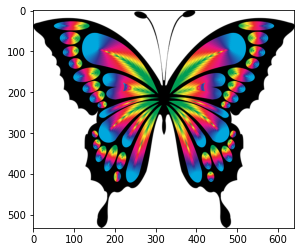

In [ ]:
test_img_np = np.array(test_img)
imshow(test_img_np)
print(test_img_np.shape)

## transforms function 정의

In [ ]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224), # 모든 이미지 사이즈를 224*224로 통일
    transforms.ColorJitter(brightness=0.2),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [ ]:
transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

## Dataset 정의 및 확인

In [ ]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언
train_dataset = torchvision.datasets.ImageFolder(
    root = './train',
    transform = transform_train
)
test_dataset = torchvision.datasets.ImageFolder(
    root = './test',
    transform = transform_test
)

In [ ]:
# Dataset 확인 과정
len(train_dataset)

18325

In [ ]:
train_dataset[0][0].shape

torch.Size([3, 224, 224])

In [ ]:
train_dataset[1][0].shape # 모두 224*244로 통일된 것 확인

torch.Size([3, 224, 224])

In [ ]:
train_dataset[0][1]

0

In [ ]:
train_dataset[10000][1]

5

## DataLoader 정의

In [ ]:
# train, test에 대해 DataLoader 정의
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = 32,
    shuffle=True,
    num_workers=2
)

In [ ]:
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size = 32,
    shuffle=False,
    num_workers=2
)

In [ ]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?
import torch.nn as nn

## ResNet 코드 예시
이걸로도 돌릴수 있음

참고) https://yhkim4504.tistory.com/3

In [ ]:
# ResNet18 구조 활용
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()

        # 3x3 필터를 사용 (너비와 높이를 줄일 때는 stride 값 조절)
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)

        # 3x3 필터를 사용 (패딩을 1만큼 주기 때문에 너비와 높이가 동일)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)
        
        out += identity # skip connection
        out = self.relu(out)

        return out

In [ ]:
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, self.in_planes, kernel_size=7, stride=2, padding=3, bias=False) # 64개의 3x3 필터(filter)를 사용
        self.bn1 = nn.BatchNorm2d(self.in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, planes, num_blocks, stride):
        downsample = None
        if stride != 1 or self.in_planes != planes:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_planes, planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

        layers = []
        layers.append(
            block(self.in_planes, planes, stride, downsample)
        )
        self.in_planes = planes # 다음 레이어를 위해 채널 수 변경
        for _ in range(1, num_blocks):
            layers.append(
                block(self.in_planes, planes)
            )
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.maxpool(self.relu(self.bn1(self.conv1(x))))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
resnet18 = ResNet(BasicBlock, [2, 2, 2, 2], 10).to(device)
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torchsummary import summary
summary(resnet18, input_size=(3, 224, 224), batch_size=32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 64, 112, 112]           9,408
       BatchNorm2d-2         [32, 64, 112, 112]             128
              ReLU-3         [32, 64, 112, 112]               0
         MaxPool2d-4           [32, 64, 56, 56]               0
            Conv2d-5           [32, 64, 56, 56]          36,864
       BatchNorm2d-6           [32, 64, 56, 56]             128
              ReLU-7           [32, 64, 56, 56]               0
            Conv2d-8           [32, 64, 56, 56]          36,864
       BatchNorm2d-9           [32, 64, 56, 56]             128
             ReLU-10           [32, 64, 56, 56]               0
       BasicBlock-11           [32, 64, 56, 56]               0
           Conv2d-12           [32, 64, 56, 56]          36,864
      BatchNorm2d-13           [32, 64, 56, 56]             128
             ReLU-14           [32, 64,

## My Model

In [ ]:
# VGG idea 차용 (3x3 conv layer로 구성)
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.convnet = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1, stride=1), # [batch_size, 3, 224, 224] -> [batch_size, 32, 224, 224]
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1, stride=1), # [batch_size, 32, 224, 224] -> [batch_size, 32, 224, 224]
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size, 32, 224, 224] -> [batch_size, 32, 112, 112]
            
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, stride=1), # [batch_size, 32, 112, 112] -> [batch_size, 64, 112, 112]
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size, 64, 112, 112] -> [batch_size, 64, 56, 56]

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1), # [batch_size, 64, 56, 56] -> [batch_size, 128, 56, 56]
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size, 128, 56, 56] -> [batch_size, 128, 28, 28]

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=1), # [batch_size, 128, 28, 28] -> [batch_size, 256, 28, 28]
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size, 256, 28, 28] -> [batch_size, 256, 14, 14]

            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1, stride=1), # [batch_size, 256, 14, 14] -> [batch_size, 512, 14, 14]
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2), # [batch_size, 512, 14, 14] -> [batch_size, 512, 7, 7]
        )

        self.fclayer = nn.Sequential(
            nn.Linear(512*7*7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 10)
        )

        # weight initialization (not necessary, but for better result)
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def forward(self,x) :
        x = self.convnet(x)
        x = x.view(x.size(0), -1)
        x = self.fclayer(x)
        return x

In [ ]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기
test_model = MyModel().to(device) # 모델 객체 선언
summary(test_model, (3,224,224), batch_size=32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 32, 224, 224]             896
       BatchNorm2d-2         [32, 32, 224, 224]              64
              ReLU-3         [32, 32, 224, 224]               0
            Conv2d-4         [32, 32, 224, 224]           9,248
       BatchNorm2d-5         [32, 32, 224, 224]              64
              ReLU-6         [32, 32, 224, 224]               0
         MaxPool2d-7         [32, 32, 112, 112]               0
            Conv2d-8         [32, 64, 112, 112]          18,496
       BatchNorm2d-9         [32, 64, 112, 112]             128
             ReLU-10         [32, 64, 112, 112]               0
           Conv2d-11         [32, 64, 112, 112]          36,928
      BatchNorm2d-12         [32, 64, 112, 112]             128
             ReLU-13         [32, 64, 112, 112]               0
        MaxPool2d-14           [32, 64,

In [ ]:
# Device 선언 (GPU 권장)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
# 모델 객체 선언
mymodel = MyModel().to(device)
mymodel

MyModel(
  (convnet): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, k

## Criterion, Optimizer

In [ ]:
# loss func, optimizer 정의
criterion = nn.CrossEntropyLoss().to(device) # criterion (loss func)도 device 위에서
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001)

## Train & Test function

In [ ]:
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [ ]:
# train 함수 정의
def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(train_dataloader):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 100 == 99:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 100 batches: {running_loss / 100}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [ ]:
# test 함수 정의
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(test_dataloader):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

## Train

In [ ]:
# training
num_epoch = 30

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)


[ Train epoch: 1 ]

Current batch: 100
Average train loss of recent 100 batches: 3.0416414296627043

Current batch: 200
Average train loss of recent 100 batches: 2.2120328903198243

Current batch: 300
Average train loss of recent 100 batches: 2.1698315155506136

Current batch: 400
Average train loss of recent 100 batches: 2.106651964187622

Current batch: 500
Average train loss of recent 100 batches: 2.069770556688309

Total train accuarcy: 24.458390177353344
Total train loss: 2.284087793365199

[ Test epoch: 1 ]

Test accuarcy: 33.00229182582124
Test average loss: 1.9414523709111098

[ Train epoch: 2 ]

Current batch: 100
Average train loss of recent 100 batches: 2.025408629179001

Current batch: 200
Average train loss of recent 100 batches: 1.9733602130413055

Current batch: 300
Average train loss of recent 100 batches: 1.9822174608707428

Current batch: 400
Average train loss of recent 100 batches: 1.8960801899433135

Current batch: 500
Average train loss of recent 100 batches: 1.9

이전에 훈련하던게 남아서 리스트의 첫번째 원소 제거

In [ ]:
del seq_train_loss[0]
del seq_test_loss[0]
del seq_train_acc[0]
del seq_test_acc[0]

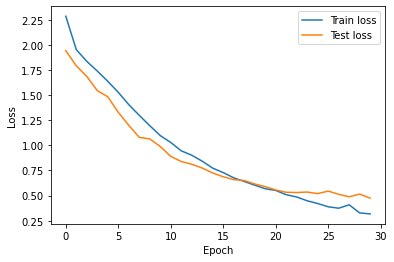

In [ ]:
# loss, accuracy 추이 확인 with plt.plot
plt.plot(range(0, num_epoch), seq_train_loss, label="Train loss")
plt.plot(range(0, num_epoch), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

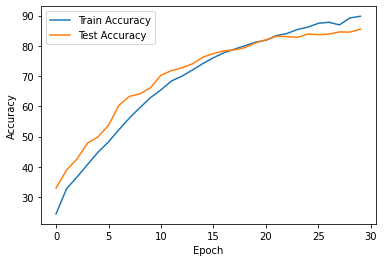

In [ ]:
plt.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
seq_test_acc[-1]

85.47237076648841

# 결과 해석
* loss 그래프를 보았을때 마지막 epoch들에서 loss가 어느 정도 수ㄹ하는 것을 보았을때 적절한 epoch 수를 설정한 것으로 판단된다.
* 최종적으로 나온 test data 기준 accuracy는 약 85%로 기대치에 미치지는 못하였다. 이에 대한 원인으로
  * 모델이 적절한 수준보다 더 Deep하였기 때문에 전체적인 Optimization이 잘 되지 않은 것으로 보인다. (Gradient Vanishing)
  * 추가 이유로, 기본적으로 주어진 이미지 데이터에서 클래스간 불균형이 존재했다. (어떤 클래스는 데이터가 많고, 어떤 클래스는 데이터가 적은 상황)
* 마지막 epoch들에서 train loss는 계속 줄어드는 반면 test loss는 더 이상 줄어들지 않고 높아지기도 하는 등 overfitting이 발생하였다. 이에 대한 원인으로
  * epoch이 많아서는 아닌 것으로 보이며,
  * 모델 summary를 보았을때, parameter 개수가 (특히 최종 FC layer에서) 과하게 많은 것으로 판단된다. (특히 위의 ResNet 코드 예시와 비교했을때) 이 때문에 overfitting이 발생한 것으로 판단된다.

# 개선 방안
* Optimization이 더 잘되는 모델을 만들기 위해 조금 더 덜 Deep한 모델을 구성해야 할 것으로 판단된다.
* Overfitting를 해결하기 위해 모델의 전체적인 parameter 개수를 줄이고, Dropout 추가, optimizer에 weight_decay 항 추가를 통한 regularization 등의 방안을 활용해야 할 것으로 판단된다.